# # ASSIGNMENT : IRIS MULTI-CLASS CLASSIFICATION

###### Purpose :
To predict the species of flower .
###### Description :
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).
###### Requirements :
1) Code must be in tf 2.0 .

2) Accuracy must be in between 95-97% .

3) Model shouldn't be Overfit (You can add drop out layer for this) .

# STEP 1 : Load all the necessary libraries 

In [3]:
import tensorflow as tf
import numpy as np 
import pandas as pd
#import matplotlib.pylab as plt


In [4]:
import matplotlib.pylab as plt

In [5]:
from tensorflow import keras

# STEP 2 : Data Preparation
This step consists of multiple sub steps from data loading [download](https://github.com/ramsha275/PIAIC-Sir-Anees-Quarter-2/blob/master/Deep%20Learning/iris.csv),shuffling ,spliting in **Train** and **Test** sets to one-hot-enconding on labels . 


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# Collect  DataFrame for future target


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


# load data with load function datasets

In [76]:
iris_data =load_iris() # load the iris dataset
#print(iris_data)
#iris_data
display(iris_data)
#iris_data =x
#x.head()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [20]:
print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])



Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]


#  # Convert data to a single column

In [22]:
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1)

In [27]:
#print(x)
#print(y)
#print(y_)

# Now use :# One Hot encode the class labels

In [28]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

D:\New folder\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [30]:
#print(y)

# #  now create  traning and testing datasest

## # Split the data for training and testing

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# check shape of array

In [40]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(30, 4)
(120, 4)
(30, 3)
(120, 3)


# check len of array

In [39]:
print(len(x_test))
print(len(x_train))
print(len(y_test))
print(len(y_train))

30
120
30
120


# # STEP 3 : Model Architecture 


###### Input : 4 
###### 1 hidden Layer : 8 nodes
###### Output : 3

## First build the model

In [42]:
model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))


In [47]:
print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                50        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


### STEP 4 : Compilation Step 
because  we use:compilation step

meaning in  the result are imporvements in speed and memory usage :


most internal benchmarks run ~1.15x faster after X_MLA is enabled


#### Adam optimizer with learning rate of 0.001


In [44]:
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 5 : Evaluation¶

## Train the model

In [54]:
model.fit(x_train, y_train, verbose=1, batch_size=5, epochs=200)


Epoch 1/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0666 - accuracy: 0.9667
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.9667: 0s - loss: 0.0401 - accuracy: 0.97
Epoch 3/200
120/120 [==============================] - 0s 917us/step - loss: 0.0685 - accuracy: 0.9750
Epoch 4/200
120/120 [==============================] - 0s 750us/step - loss: 0.0538 - accuracy: 0.9750
Epoch 5/200
120/120 [==============================] - 0s 683us/step - loss: 0.0544 - accuracy: 0.9750
Epoch 6/200
120/120 [==============================] - 0s 733us/step - loss: 0.0529 - accuracy: 0.9833
Epoch 7/200
120/120 [==============================] - 0s 675us/step - loss: 0.0508 - accuracy: 0.9750
Epoch 8/200
120/120 [==============================] - 0s 750us/step - loss: 0.0505 - accuracy: 0.9750
Epoch 9/200
120/120 [==============================] - 0s 742us/step - loss: 0.0510 - accuracy: 0.9750
Epoch 10/200
120/120 [===================

120/120 [==============================] - 0s 525us/step - loss: 0.0529 - accuracy: 0.9833
Epoch 80/200
120/120 [==============================] - 0s 450us/step - loss: 0.0520 - accuracy: 0.9750
Epoch 81/200
120/120 [==============================] - 0s 508us/step - loss: 0.0496 - accuracy: 0.9750
Epoch 82/200
120/120 [==============================] - 0s 492us/step - loss: 0.0549 - accuracy: 0.9750
Epoch 83/200
120/120 [==============================] - 0s 500us/step - loss: 0.0593 - accuracy: 0.9750
Epoch 84/200
120/120 [==============================] - 0s 433us/step - loss: 0.0494 - accuracy: 0.9750
Epoch 85/200
120/120 [==============================] - 0s 525us/step - loss: 0.0534 - accuracy: 0.9750
Epoch 86/200
120/120 [==============================] - 0s 492us/step - loss: 0.0493 - accuracy: 0.9833
Epoch 87/200
120/120 [==============================] - 0s 450us/step - loss: 0.0515 - accuracy: 0.9750
Epoch 88/200
120/120 [==============================] - 0s 550us/step - loss:

Epoch 157/200
120/120 [==============================] - 0s 525us/step - loss: 0.0478 - accuracy: 0.9833
Epoch 158/200
120/120 [==============================] - 0s 500us/step - loss: 0.0486 - accuracy: 0.9833
Epoch 159/200
120/120 [==============================] - 0s 467us/step - loss: 0.0488 - accuracy: 0.9750
Epoch 160/200
120/120 [==============================] - 0s 525us/step - loss: 0.0506 - accuracy: 0.9833
Epoch 161/200
120/120 [==============================] - 0s 483us/step - loss: 0.0538 - accuracy: 0.9750
Epoch 162/200
120/120 [==============================] - 0s 425us/step - loss: 0.0525 - accuracy: 0.9750
Epoch 163/200
120/120 [==============================] - 0s 425us/step - loss: 0.0495 - accuracy: 0.9750
Epoch 164/200
120/120 [==============================] - 0s 533us/step - loss: 0.0473 - accuracy: 0.9833
Epoch 165/200
120/120 [==============================] - 0s 450us/step - loss: 0.0580 - accuracy: 0.9750
Epoch 166/200
120/120 [==============================] 

# STEP 6 : Prediction 

### Test on unseen data


In [55]:
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.036624
Final test set accuracy: 1.000000


In [58]:
i = 10
prediction =  model.predict_classes(x_test[i].reshape(1,4))

In [59]:
if prediction == 0:
    
    
    print("The data is :",x_test[i],"and I have predicted that it's a",prediction,"i.e Iris-setosa")
    print("Actual data :",x_test[i] , "actual label :",y_test[i])

elif prediction == 1:
    
    print("The data is :",x_test[i],"and I have predicted that it's a",prediction,"i.e Iris-versicolor")
    print("Actual data :",x_test[i] , "actual label :",y_test[i])

else:
    
    print("The data is :",x_test[i],"and I have predicted that it's a",prediction,"i.e Iris-virginica")
    print("Actual data :",x_test[i] , "actual label :",y_test[i])


The data is : [6.5 3.  5.5 1.8] and I have predicted that it's a [2] i.e Iris-virginica
Actual data : [6.5 3.  5.5 1.8] actual label : [0. 0. 1.]


In [62]:
plt.show(iris_data)

In [63]:
plt.imag(iris_data)

array(0, dtype=object)

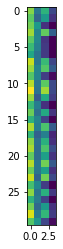

In [66]:
plt.imshow(x_test)